<a href="https://colab.research.google.com/github/Srilekha020/DEVOPSLAB/blob/master/harnessing_of_clinicle_diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data=pd.read_csv("dataset1.csv")
print(data.head())

   Rank   NCT Number                                              Title  \
0     1  NCT04785898  Diagnostic Performance of the ID Now™ COVID-19...   
1     2  NCT04595136  Study to Evaluate the Efficacy of COVID19-0001...   
2     3  NCT04395482  Lung CT Scan Analysis of SARS-CoV2 Induced Lun...   
3     4  NCT04416061  The Role of a Private Hospital in Hong Kong Am...   
4     5  NCT04395924         Maternal-foetal Transmission of SARS-Cov-2   

        Acronym                  Status         Study Results  \
0   COVID-IDNow  Active, not recruiting  No Results Available   
1      COVID-19      Not yet recruiting  No Results Available   
2   TAC-COVID19              Recruiting  No Results Available   
3      COVID-19  Active, not recruiting  No Results Available   
4  TMF-COVID-19              Recruiting  No Results Available   

                                          Conditions  \
0                                            Covid19   
1                               SARS-CoV-2 Inf

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys              

In [ ]:
data.describe()

,Rank,Enrollment
count,5783.000000,5.749000e+03
mean,2892.000000,1.831949e+04
std,1669.552635,4.045437e+05
min,1.000000,0.000000e+00
25%,1446.500000,6.000000e+01
50%,2892.000000,1.700000e+02
75%,4337.500000,5.600000e+02
max,5783.000000,2.000000e+07


In [ ]:
data.isnull()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5778,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
5779,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
5780,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
5781,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False


In [ ]:
data.isnull().sum()

Rank                          0
NCT Number                    0
Title                         0
Acronym                    3303
Status                        0
Study Results                 0
Conditions                    0
Interventions               886
Outcome Measures             35
Sponsor/Collaborators         0
Gender                       10
Age                           0
Phases                     2461
Enrollment                   34
Funded Bys                    0
Study Type                    0
Study Designs                35
Other IDs                     1
Start Date                   34
Primary Completion Date      36
Completion Date              36
First Posted                  0
Results First Posted       5747
Last Update Posted            0
Locations                   585
Study Documents            5601
URL                           0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Load the dataset
file_path = '/mnt/data/dataset1.csv'
df = pd.read_csv("dataset1.csv")

# Step 1: Handle Missing Values
# Drop columns with a high percentage of missing values (e.g., more than 50%)
df = df.drop(columns=['Results First Posted', 'Study Documents'])

# Fill missing values in numerical columns with the median
df['Enrollment'].fillna(df['Enrollment'].median(), inplace=True)

# Fill missing values in categorical columns with the mode
df['Acronym'].fillna(df['Acronym'].mode()[0], inplace=True)
df['Interventions'].fillna(df['Interventions'].mode()[0], inplace=True)
df['Outcome Measures'].fillna(df['Outcome Measures'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Phases'].fillna(df['Phases'].mode()[0], inplace=True)
df['Study Designs'].fillna(df['Study Designs'].mode()[0], inplace=True)
df['Other IDs'].fillna(df['Other IDs'].mode()[0], inplace=True)
df['Start Date'].fillna(df['Start Date'].mode()[0], inplace=True)
df['Primary Completion Date'].fillna(df['Primary Completion Date'].mode()[0], inplace=True)
df['Completion Date'].fillna(df['Completion Date'].mode()[0], inplace=True)
df['Locations'].fillna(df['Locations'].mode()[0], inplace=True)

# Step 2: Convert Data Types
# Convert date columns to datetime format
date_columns = ['Start Date', 'Primary Completion Date', 'Completion Date', 'First Posted', 'Last Update Posted']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Step 3: Encode Categorical Variables
# Identify categorical columns, removing 'Status' as it is the target variable
categorical_columns = ['NCT Number', 'Title', 'Acronym', 'Study Results', 'Conditions', 'Interventions',
                       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Funded Bys', 'Study Type',
                       'Study Designs', 'Other IDs', 'Locations', 'URL']  # Removed 'Status'

# Use OneHotEncoder for these categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Enrollment']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

# Step 4: Remove Duplicates
df = df.drop_duplicates()

# Step 5: Split Data
# Assuming 'Status' is the target variable for this example
X = df.drop('Status', axis=1)
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the preprocessing pipeline
# Now, X_train does not contain the 'Status' column, so it should work
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# The dataset is now preprocessed and ready for machine learning models
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4626, 33591), (1157, 33591), (4626,), (1157,))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Load the dataset
file_path = '/mnt/data/dataset1.csv'
df = pd.read_csv("dataset1.csv")

# Step 1: Handle Missing Values
# Drop columns with a high percentage of missing values (e.g., more than 50%)
df = df.drop(columns=['Results First Posted', 'Study Documents'])

# Fill missing values in numerical columns with the median
df['Enrollment'].fillna(df['Enrollment'].median(), inplace=True)

# Fill missing values in categorical columns with the mode
df['Acronym'].fillna(df['Acronym'].mode()[0], inplace=True)
df['Interventions'].fillna(df['Interventions'].mode()[0], inplace=True)
df['Outcome Measures'].fillna(df['Outcome Measures'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Phases'].fillna(df['Phases'].mode()[0], inplace=True)
df['Study Designs'].fillna(df['Study Designs'].mode()[0], inplace=True)
df['Other IDs'].fillna(df['Other IDs'].mode()[0], inplace=True)
df['Start Date'].fillna(df['Start Date'].mode()[0], inplace=True)
df['Primary Completion Date'].fillna(df['Primary Completion Date'].mode()[0], inplace=True)
df['Completion Date'].fillna(df['Completion Date'].mode()[0], inplace=True)
df['Locations'].fillna(df['Locations'].mode()[0], inplace=True)

# Step 2: Convert Data Types
# Convert date columns to datetime format
date_columns = ['Start Date', 'Primary Completion Date', 'Completion Date', 'First Posted', 'Last Update Posted']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Step 3: Encode Categorical Variables
# Identify categorical columns, removing 'NCT Number' and 'Status'
categorical_columns = ['Title', 'Acronym', 'Study Results', 'Conditions', 'Interventions',
                       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Funded Bys', 'Study Type',
                       'Study Designs', 'Other IDs', 'Locations', 'URL']  # Removed 'NCT Number' and 'Status'

# Use OneHotEncoder for these categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Enrollment']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

# Step 4: Remove Duplicates
df = df.drop_duplicates()

# Step 5: Split Data
# Assuming 'Status' is the target variable for this example
X = df.drop(['Status', 'NCT Number'], axis=1)  # Also drop 'NCT Number' here
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the preprocessing pipeline
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# The dataset is now preprocessed and ready for machine learning models
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4626, 28965), (1157, 28965), (4626,), (1157,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming X and y are already defined and preprocessed as in the previous code

# Split the data (assuming this wasn't done in preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the preprocessing pipeline to X_train and X_test
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Create a simple RandomForest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)  # Now fitting with preprocessed data

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# ... (Rest of the code for hyperparameter tuning)

Confusion Matrix:
 [[  0   0   1   0   0   0  91   0   0   0   0]
 [  0   2   0   0   0   0   0   0   0   0   0]
 [  0   0  17   0   0   5 191   0   0   0   0]
 [  0   0   2   0   0   0  32   0   0   0   0]
 [  0   2   0   0   0   1   0   0   0   0   0]
 [  0   0   1   0   0 109  93   0   0   0   0]
 [  0   0   3   0   0   0 558   0   0   0   0]
 [  0   0   0   0   0   0   9   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0]
 [  0   0   2   0   0   0  14   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0  22]]
Classification Report:
                            precision    recall  f1-score   support

   Active, not recruiting       0.00      0.00      0.00        92
                Available       0.40      1.00      0.57         2
                Completed       0.65      0.08      0.14       213
  Enrolling by invitation       0.00      0.00      0.00        34
      No longer available       0.00      0.00      0.00         3
       Not yet recruiting       0.94

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


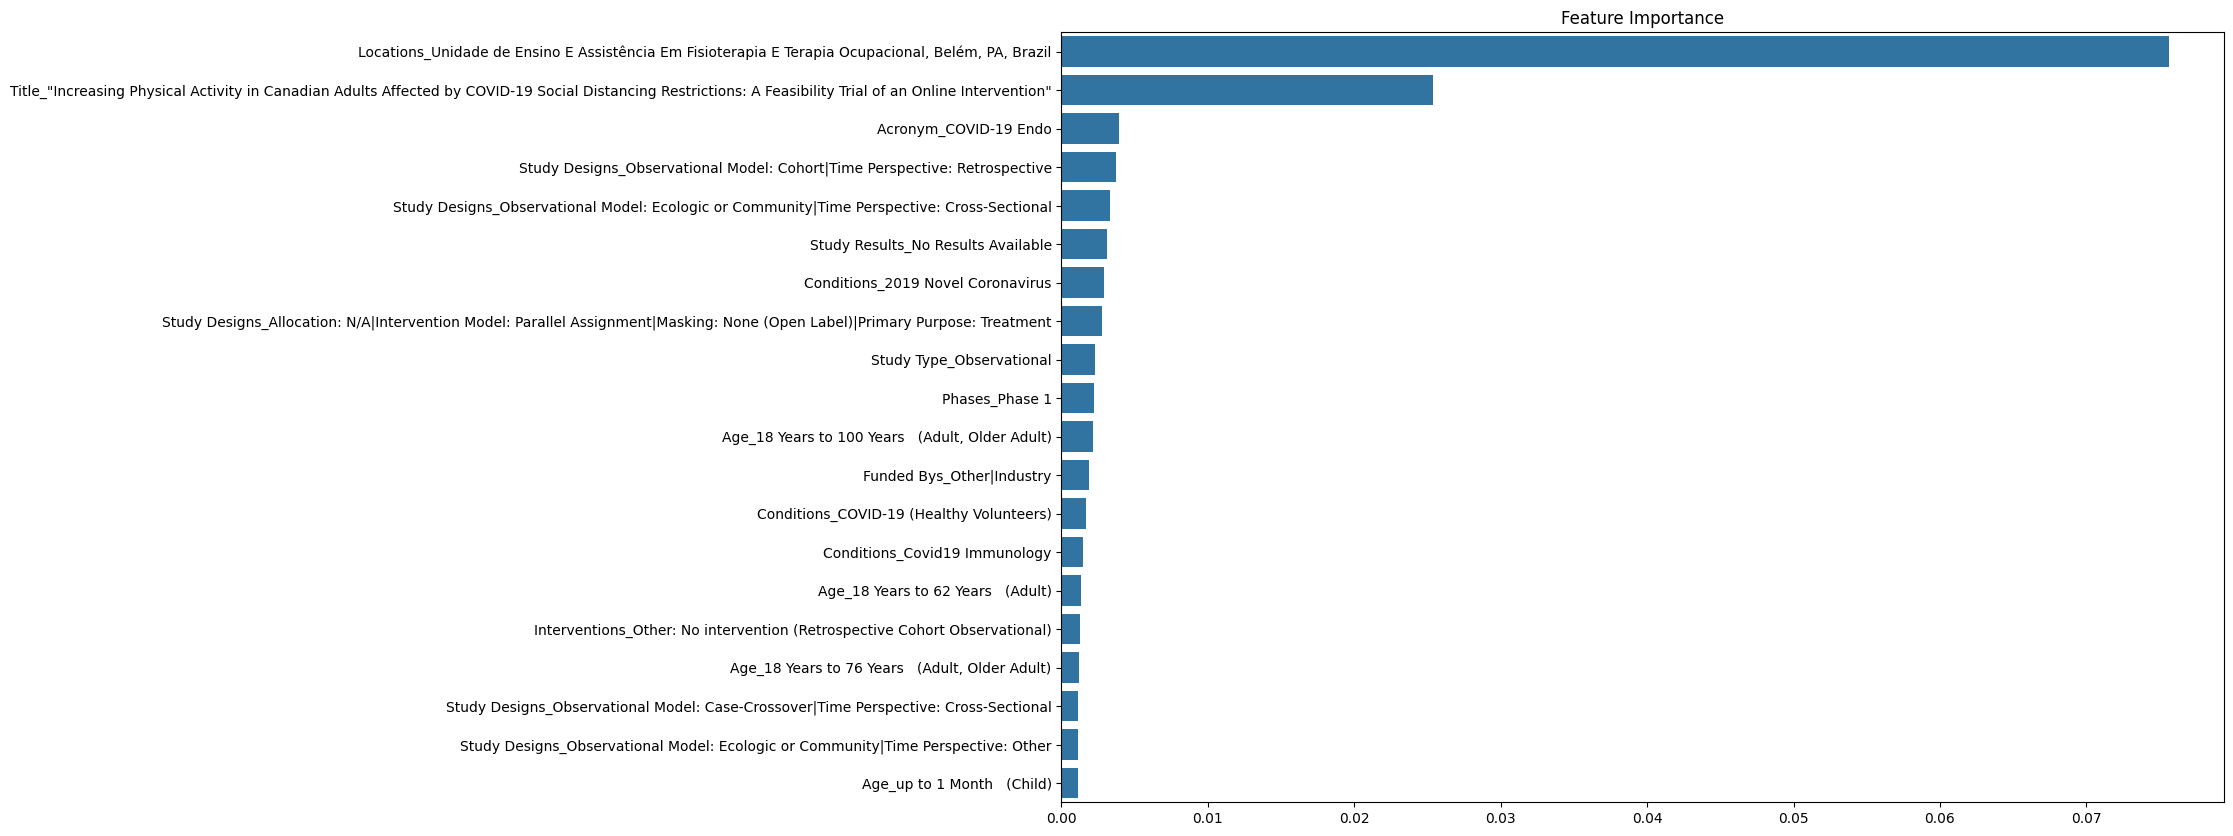

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance for RandomForest
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Assuming 'categorical_columns' from your previous code contains the names of categorical features
feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_columns)  # Use categorical_columns

# Plot feature importance
plt.figure(figsize=(15, 10))
plt.title("Feature Importance")
sns.barplot(x=importances[indices][:20], y=[feature_names[i] for i in indices[:20]])
plt.show()

In [ ]:
import joblib

# Save the model
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [ ]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd

# Load the trained model
model = joblib.load('random_forest_model.pkl')  # Load the correct file name

# Initialize the Flask application
app = Flask(__name__)

# Define the route for predictions
@app.route('/predict', methods=['POST'])
def predict():
    # Get the JSON data from the request
    data = request.get_json()

    # Convert data into a DataFrame
    df = pd.DataFrame(data)

    # Apply the same preprocessing steps as during training
    df_processed = preprocessor.transform(df)

    # Make predictions
    predictions = model.predict(df_processed)

    # Return the predictions as a JSON response
    return jsonify({'predictions': predictions.tolist()})

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
import pandas as pd

# Load the datasets
initial_phase_df = pd.read_csv("dataset11.csv")
second_phase_df = pd.read_csv("dataset12.csv")

def get_patient_outcome(patient_identifier):
    # Search for the patient in the initial phase dataset
    if isinstance(patient_identifier, int):  # If the identifier is an integer, assume it's the Patient ID
        initial_record = initial_phase_df[initial_phase_df["Patient ID"] == patient_identifier]
        second_record = second_phase_df[second_phase_df["Patient ID"] == patient_identifier]
    else:  # Otherwise, assume it's the Name
        initial_record = initial_phase_df[initial_phase_df["Name"] == patient_identifier]
        second_record = second_phase_df[second_phase_df["Name"] == patient_identifier]

    # Check if patient is found
    if initial_record.empty or second_record.empty:
        return f"Patient with identifier '{patient_identifier}' not found."

    # Retrieve the outcome
    initial_outcome = initial_record.iloc[0]["Outcome"]
    second_outcome = second_record.iloc[0]["Outcome"]

    # Construct the response
    response = {
        "Initial Phase": {
            "Patient ID": initial_record.iloc[0]["Patient ID"],
            "Name": initial_record.iloc[0]["Name"],
            "Age": initial_record.iloc[0]["Age"],
            "Gender": initial_record.iloc[0]["Gender"],
            "Disorder": initial_record.iloc[0]["Disorder"],
            "Dosage Stage": initial_record.iloc[0]["Dosage Stage"],
            "Observations": initial_record.iloc[0]["Observations"],
            "Lab Result": initial_record.iloc[0]["Lab Result"],
            "Initial Response": initial_record.iloc[0]["Initial Response"],
            "Side Effects": initial_record.iloc[0]["Side Effects"],
            "Outcome": initial_outcome
        },
        "Second Phase": {
            "Patient ID": second_record.iloc[0]["Patient ID"],
            "Name": second_record.iloc[0]["Name"],
            "Age": second_record.iloc[0]["Age"],
            "Gender": second_record.iloc[0]["Gender"],
            "Disorder": second_record.iloc[0]["Disorder"],
            "Dosage Stage": second_record.iloc[0]["Dosage Stage"],
            "Observations": second_record.iloc[0]["Observations"],
            "Lab Result": second_record.iloc[0]["Lab Result"],
            "Initial Response": second_record.iloc[0]["Initial Response"],
            "Side Effects": second_record.iloc[0]["Side Effects"],
            "Outcome": second_outcome
        }
    }

    return response

# Example usage:
patient_identifier = input("Enter Patient ID or Name: ")
outcome = get_patient_outcome(patient_identifier)
print(outcome)


Enter Patient ID or Name: Bob Clark
{'Initial Phase': {'Patient ID': 1001, 'Name': 'Bob Clark', 'Age': 78, 'Gender': 'Male', 'Disorder': 'Depression', 'Dosage Stage': 'Stage 3', 'Observations': 'Low mood', 'Lab Result': 'Elevated', 'Initial Response': 'No Change', 'Side Effects': 'Dizziness', 'Outcome': 'Deteriorated'}, 'Second Phase': {'Patient ID': 1001, 'Name': 'Bob Clark', 'Age': 78, 'Gender': 'Male', 'Disorder': 'Depression', 'Dosage Stage': 'Stage 4', 'Observations': 'Improved low mood', 'Lab Result': 'Elevated', 'Initial Response': 'Improvement', 'Side Effects': 'Dizziness', 'Outcome': 'Deteriorated'}}


In [ ]:
!pip install flask-cors  # Install the flask-cors module

from flask import Flask, request, jsonify, render_template
import pandas as pd
from flask_cors import CORS  # Now you can import it

# ... rest of your code ...

In [ ]:
from flask import Flask, request, jsonify, render_template
import pandas as pd
from flask_cors import CORS

app = Flask(__name__)
CORS(app)  # Allow cross-origin requests

# Load the datasets
initial_phase_df = pd.read_csv("dataset11.csv")
second_phase_df = pd.read_csv("dataset12.csv")

def get_patient_outcome(patient_identifier):
    if isinstance(patient_identifier, int):  # If the identifier is an integer, assume it's the Patient ID
        initial_record = initial_phase_df[initial_phase_df["Patient ID"] == patient_identifier]
        second_record = second_phase_df[second_phase_df["Patient ID"] == patient_identifier]
    else:  # Otherwise, assume it's the Name
        initial_record = initial_phase_df[initial_phase_df["Name"] == patient_identifier]
        second_record = second_phase_df[second_phase_df["Name"] == patient_identifier]

    if initial_record.empty or second_record.empty:
        return None

    initial_outcome = initial_record.iloc[0]["Outcome"]
    second_outcome = second_record.iloc[0]["Outcome"]

    response = {
        "Initial Phase": {
            "Patient ID": initial_record.iloc[0]["Patient ID"],
            "Name": initial_record.iloc[0]["Name"],
            "Age": initial_record.iloc[0]["Age"],
            "Gender": initial_record.iloc[0]["Gender"],
            "Disorder": initial_record.iloc[0]["Disorder"],
            "Dosage Stage": initial_record.iloc[0]["Dosage Stage"],
            "Observations": initial_record.iloc[0]["Observations"],
            "Lab Result": initial_record.iloc[0]["Lab Result"],
            "Initial Response": initial_record.iloc[0]["Initial Response"],
            "Side Effects": initial_record.iloc[0]["Side Effects"],
            "Outcome": initial_outcome
        },
        "Second Phase": {
            "Patient ID": second_record.iloc[0]["Patient ID"],
            "Name": second_record.iloc[0]["Name"],
            "Age": second_record.iloc[0]["Age"],
            "Gender": second_record.iloc[0]["Gender"],
            "Disorder": second_record.iloc[0]["Disorder"],
            "Dosage Stage": second_record.iloc[0]["Dosage Stage"],
            "Observations": second_record.iloc[0]["Observations"],
            "Lab Result": second_record.iloc[0]["Lab Result"],
            "Initial Response": second_record.iloc[0]["Initial Response"],
            "Side Effects": second_record.iloc[0]["Side Effects"],
            "Outcome": second_outcome
        }
    }

    return response

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/get_patient_outcome', methods=['GET'])
def get_patient_outcome_route():
    patient_identifier = request.args.get('identifier')

    try:
        patient_identifier = int(patient_identifier)
    except ValueError:
        pass

    outcome = get_patient_outcome(patient_identifier)

    if outcome is None:
        return jsonify({"error": f"Patient with identifier '{patient_identifier}' not found."}), 404
    else:
        return jsonify(outcome)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
from flask import Flask, request, jsonify, render_template_string
import pandas as pd
from flask_cors import CORS
import threading
from werkzeug.serving import make_server

# Create the Flask app
app = Flask(__name__)
CORS(app)

# Load the datasets
initial_phase_df = pd.read_csv("dataset11.csv")
second_phase_df = pd.read_csv("dataset12.csv")

def get_patient_outcome(patient_identifier):
    if isinstance(patient_identifier, int):  # If the identifier is an integer, assume it's the Patient ID
        initial_record = initial_phase_df[initial_phase_df["Patient ID"] == patient_identifier]
        second_record = second_phase_df[second_phase_df["Patient ID"] == patient_identifier]
    else:  # Otherwise, assume it's the Name
        initial_record = initial_phase_df[initial_phase_df["Name"] == patient_identifier]
        second_record = second_phase_df[second_phase_df["Name"] == patient_identifier]

    if initial_record.empty or second_record.empty:
        return None

    initial_outcome = initial_record.iloc[0]["Outcome"]
    second_outcome = second_record.iloc[0]["Outcome"]

    response = {
        "Initial Phase": {
            "Patient ID": initial_record.iloc[0]["Patient ID"],
            "Name": initial_record.iloc[0]["Name"],
            "Age": initial_record.iloc[0]["Age"],
            "Gender": initial_record.iloc[0]["Gender"],
            "Disorder": initial_record.iloc[0]["Disorder"],
            "Dosage Stage": initial_record.iloc[0]["Dosage Stage"],
            "Observations": initial_record.iloc[0]["Observations"],
            "Lab Result": initial_record.iloc[0]["Lab Result"],
            "Initial Response": initial_record.iloc[0]["Initial Response"],
            "Side Effects": initial_record.iloc[0]["Side Effects"],
            "Outcome": initial_outcome
        },
        "Second Phase": {
            "Patient ID": second_record.iloc[0]["Patient ID"],
            "Name": second_record.iloc[0]["Name"],
            "Age": second_record.iloc[0]["Age"],
            "Gender": second_record.iloc[0]["Gender"],
            "Disorder": second_record.iloc[0]["Disorder"],
            "Dosage Stage": second_record.iloc[0]["Dosage Stage"],
            "Observations": second_record.iloc[0]["Observations"],
            "Lab Result": second_record.iloc[0]["Lab Result"],
            "Initial Response": second_record.iloc[0]["Initial Response"],
            "Side Effects": second_record.iloc[0]["Side Effects"],
            "Outcome": second_outcome
        }
    }

    return response

@app.route('/')
def index():
    return render_template_string('<h1>Welcome to the Patient Outcome API</h1>')

@app.route('/get_patient_outcome', methods=['GET'])
def get_patient_outcome_route():
    patient_identifier = request.args.get('identifier')

    try:
        patient_identifier = int(patient_identifier)
    except ValueError:
        pass

    outcome = get_patient_outcome(patient_identifier)

    if outcome is None:
        return jsonify({"error": f"Patient with identifier '{patient_identifier}' not found."}), 404
    else:
        return jsonify(outcome)

# Function to run the Flask app
def run_app():
    app.run(port=5000)

# Start the Flask app in a separate thread
thread = threading.Thread(target=run_app)
thread.start()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
!pip install pyngrok

from pyngrok import ngrok

# Set your authtoken
ngrok.set_auth_token("2iDzEDK8TQQmktj06I20RdLQSGr_6cRjsivkcieP97YKgesPu")  # Replace with your actual authtoken

# Create a tunnel to the Flask app, specifying the port using 'bind_tls'
tunnel = ngrok.connect(addr="5000", bind_tls=True)  # Use 'bind_tls' to indicate HTTPS
public_url = tunnel.public_url
print(f"Public URL: {public_url}")

Public URL: https://5bca-35-245-208-16.ngrok-free.app


In [ ]:
# Install dependencies
!pip install Flask pandas flask_cors pyngrok

# Upload CSV files
from google.colab import files
uploaded = files.upload()

# Flask application
from flask import Flask, request, jsonify, render_template_string
import pandas as pd
from flask_cors import CORS
import threading
from werkzeug.serving import make_server
from pyngrok import ngrok

app = Flask(__name__)
CORS(app)

# Load the datasets
initial_phase_df = pd.read_csv("dataset11.csv")
second_phase_df = pd.read_csv("dataset12.csv")

# ... (rest of your code remains the same)

# Function to run the Flask app
def run_app():
    app.run(port=5000)

# Start the Flask app in a separate thread
thread = threading.Thread(target=run_app)
thread.start()

# Create a tunnel to the Flask app, passing the port as a number
public_url = ngrok.connect(5000) # Change here: pass port as an integer, not a string
print(f"Public URL: {public_url}")

Saving app (1).py to app (1).py
 * Serving Flask app '__main__'
 * Debug mode: off
Public URL: NgrokTunnel: "https://fecb-35-245-208-16.ngrok-free.app" -> "http://localhost:5000"


Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.


In [ ]:
"C:\\forhealth"
"templates\\index.html"
"app.py"
"dataset11.csv"
"dataset12.csv"

'dataset12.csv'

In [ ]:
!ls # List all files and directories in the current directory

app.py	dataset11.csv  dataset12.csv  dataset1.csv  random_forest_model.pkl  sample_data  templates


In [ ]:
from flask import Flask, request, jsonify, render_template
import pandas as pd
from flask_cors import CORS

app = Flask(__name__)
CORS(app)

# Load the datasets
initial_phase_df = pd.read_csv("dataset11.csv")
second_phase_df = pd.read_csv("dataset12.csv")

# ... (rest of your code remains the same)

if __name__ == '__main__':
    # Try a different port to avoid conflicts
    app.run(debug=True, port=5001)  # Changed port to 5001

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5001
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
from flask import Flask, request, jsonify, render_template
import pandas as pd
from flask_cors import CORS
import threading
from werkzeug.serving import make_server
from pyngrok import ngrok

app = Flask(__name__)
CORS(app)

# Load the datasets
initial_phase_df = pd.read_csv("dataset11.csv")
second_phase_df = pd.read_csv("dataset12.csv")

# ... [rest of your code remains the same]

if __name__ == '__main__':
    # Use a different port or terminate any processes using port 5000
    port = 5001  # Choose a different port
    # Create a tunnel to the Flask app, specifying the port using 'bind_tls'
    tunnel = ngrok.connect(addr=f"{port}", bind_tls=True)  # Use 'bind_tls' to indicate HTTPS
    public_url = tunnel.public_url
    print(f"Public URL: {public_url}")
    app.run(port=port, debug=True)  # Run the app in the main thread

Public URL: https://52fe-35-245-208-16.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5001
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
!nohup python -m flask run --host=0.0.0.0 --port=5000 &


nohup: appending output to 'nohup.out'


In [ ]:
!pip install pyngrok
from pyngrok import ngrok

# Specify the port as a number directly within the 'addr' parameter
public_url = ngrok.connect(addr=5001)
print(public_url)

NgrokTunnel: "https://8974-35-245-208-16.ngrok-free.app" -> "http://localhost:5001"


In [ ]:
public_url = ngrok.connect(5001)  # Pass port as an integer
print(public_url)

NgrokTunnel: "https://7090-35-245-208-16.ngrok-free.app" -> "http://localhost:5001"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=5001)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5001
 * Running on http://172.28.0.12:5001
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
# In your Flask app
if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=5002)

# In your ngrok command
public_url = ngrok.connect(5002)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5002
 * Running on http://172.28.0.12:5002
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5001, debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5001
 * Running on http://172.28.0.12:5001
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
